Extract lyrics from the text files

In [1]:
import pandas as pd
import os

def text_files_to_dataframe(folder_path):
    """
    Reads all .txt files in a given folder and creates a pandas DataFrame
    where each row contains the content of one file.

    Args:
        folder_path (str): The path to the folder containing the .txt files.

    Returns:
        pandas.DataFrame: A DataFrame with a single column 'text_content'
                          where each row holds the text from a file.
                          Returns an empty DataFrame if no .txt files are found.
    """
    all_texts = []
    filenames = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(folder_path, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    all_texts.append(text)
                    filenames.append(filename)
            except Exception as e:
                print(f"Error reading file '{filename}': {e}")

    df = pd.DataFrame({'filename': filenames, 'text_content': all_texts})
    return df

Load data into a Pandas data frame

In [2]:
df = text_files_to_dataframe("C:\\Users\\roade\\OneDrive\\Documents\\Desktop\\Data Science\\Song-Sentiment-Analysis-\\Good Kid")

Error reading file 'EverythingEverything.txt': 'utf-8' codec can't decode byte 0xe1 in position 705: invalid continuation byte


In [3]:
df.head()

,filename,text_content
0,Alchemist.txt,"Give it up, give it up, give it away\nWell you..."
1,AloeLite.txt,These days all I see is everything you're not\...
2,Atlas.txt,Baby if you don't stand for something\nHow can...
3,Break.txt,"Written in the back of my old diary\n""We all g..."
4,Bubbly.txt,I came in a bit before the opening set\nI took...


Test 

In [4]:
print(df.iloc[0, 1])

Give it up, give it up, give it away
Well you were barely alive, and you learnt that day
Cut off so much, hardly remained
Well you knew that there was still a way
Cry and cave in, try anyway
Well you got him back, but then you had to pay
Stand up, push us, still to this day
Oh, you knew that there was still a way
This is your only plan
Oh, now this is your only
Now this is your only plan
Oh, now this is yours

That's fine
It's all you've ever known
A single state of mind
But you won't ever let it go

When you had the answer
And you were there alone
You left the door unopened
When you knew that you would want more

Give it up, give it up, give it away
Well you were barely aware and you learnt that day
Cut off so much, hardly remained
Oh, well you knew that there was still a way
This is your only plan
Oh, now this is your only
Now this is your only plan
Oh, now this is yours

And you're right
You'll force it to yield
You'll forge it to the lines
You'll let your callous be your shield
And

Next, we will add sentiment labels to the data frame using TextBlob. We will define the thresholds for positive, negative, and neutral sentiment and add those tags to our data. 

In [5]:
from textblob import TextBlob

def get_textblob_sentiment(lyrics):
    analysis = TextBlob(lyrics)
    return analysis.sentiment.polarity

df['textblob_sentiment'] = df['text_content'].apply(get_textblob_sentiment)

# Define thresholds for classification
threshold_positive = 0.1
threshold_negative = -0.1

def classify_textblob_sentiment(score):
    if score >= threshold_positive:
        return 'positive'
    elif score <= threshold_negative:
        return 'negative'
    else:
        return 'neutral'

df['textblob_classification'] = df['textblob_sentiment'].apply(classify_textblob_sentiment)

print(df[['filename', 'text_content', 'textblob_sentiment', 'textblob_classification']].head())

        filename                                       text_content  \
0  Alchemist.txt  Give it up, give it up, give it away\nWell you...   
1   AloeLite.txt  These days all I see is everything you're not\...   
2      Atlas.txt  Baby if you don't stand for something\nHow can...   
3      Break.txt  Written in the back of my old diary\n"We all g...   
4     Bubbly.txt  I came in a bit before the opening set\nI took...   

   textblob_sentiment textblob_classification  
0            0.103486                positive  
1           -0.200000                negative  
2            0.250000                positive  
3            0.100926                positive  
4            0.051420                 neutral  


Now, we will encode the data using a Sentence-BERT model. This will encode our text data into numerical vectors of a fixed size. Each vector will represent the lyrics of a song, and they will be high-dimensional. The idea here is that songs with a similar meaning will have embeddings that are "closer" to each other in high-dimensional vector space. This will allow us to use clustering algorithms and visualize potential groups of this artist's songs. 

In [ ]:
print("\n--- Starting Sentence-BERT Encoding ---")
from sentence_transformers import SentenceTransformer

# load the Sentence-BERT model
model_name = 'all-MiniLM-L6-v2'
print(f"Loading Sentence-BERT model: {model_name}")
try:
    model = SentenceTransformer(model_name, device='cuda') # Or device='cpu'
    print("Using GPU for encoding.")
except Exception:
    print("CUDA not available or error occurred. Using CPU for encoding.")
    model = SentenceTransformer(model_name, device='cpu')
model = SentenceTransformer(model_name, device='cpu')

# encode lyrics
lyrics_list = df['text_content'].tolist()

if not lyrics_list:
    print("Lyrics list is empty. Cannot encode.")
    exit()

print(f"Encoding {len(lyrics_list)} song lyrics...")
embeddings = model.encode(lyrics_list, show_progress_bar=True)

print(f"Encoding complete. Shape of embeddings matrix: {embeddings.shape}")


--- Starting Sentence-BERT Encoding ---


c:\Users\roade\OneDrive\Documents\Desktop\Data Science\Song-Sentiment-Analysis-\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Sentence-BERT model: all-MiniLM-L6-v2


c:\Users\roade\OneDrive\Documents\Desktop\Data Science\Song-Sentiment-Analysis-\venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\roade\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the

CUDA not available or error occurred. Using CPU for encoding.
Encoding 28 song lyrics...


Batches: 100%|██████████| 1/1 [00:04<00:00,  4.45s/it]

Encoding complete. Shape of embeddings matrix: (28, 384)



--- Proceeding to Clustering (Example: K-Means) ---
Calculating inertia for Elbow Method...

--- Elbow Method Plot ---


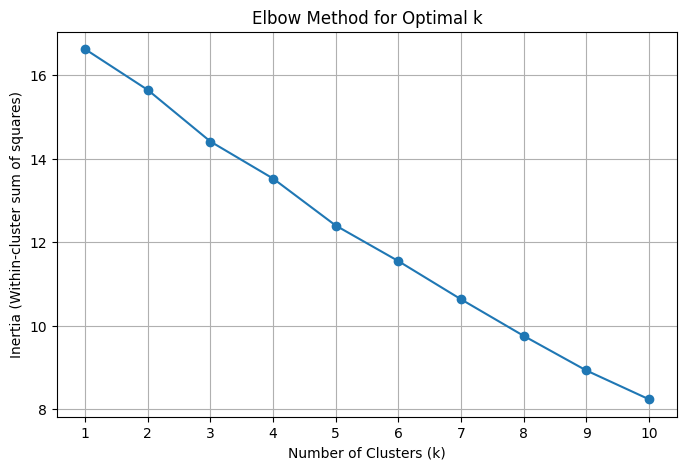

Using k=2 for clustering.

Applying K-Means with k=2...

--- DataFrame with Cluster Labels ---
                filename textblob_classification  cluster
0          Alchemist.txt                positive        0
1           AloeLite.txt                negative        0
2              Atlas.txt                positive        1
3              Break.txt                positive        0
4             Bubbly.txt                 neutral        0
5         DanceClass.txt                 neutral        0
6    DownWithTheKing.txt                negative        0
7           Drifting.txt                 neutral        0
8       DWTKAcoustic.txt                negative        0
9  EpilogueSlingshot.txt                 neutral        1

--- Sentiment Analysis per Cluster ---

Average TextBlob Sentiment per Cluster:
             mean       std  count
cluster                           
0       -0.008266  0.140457     18
1        0.130378  0.139920     10

Distribution of TextBlob Classifications per 

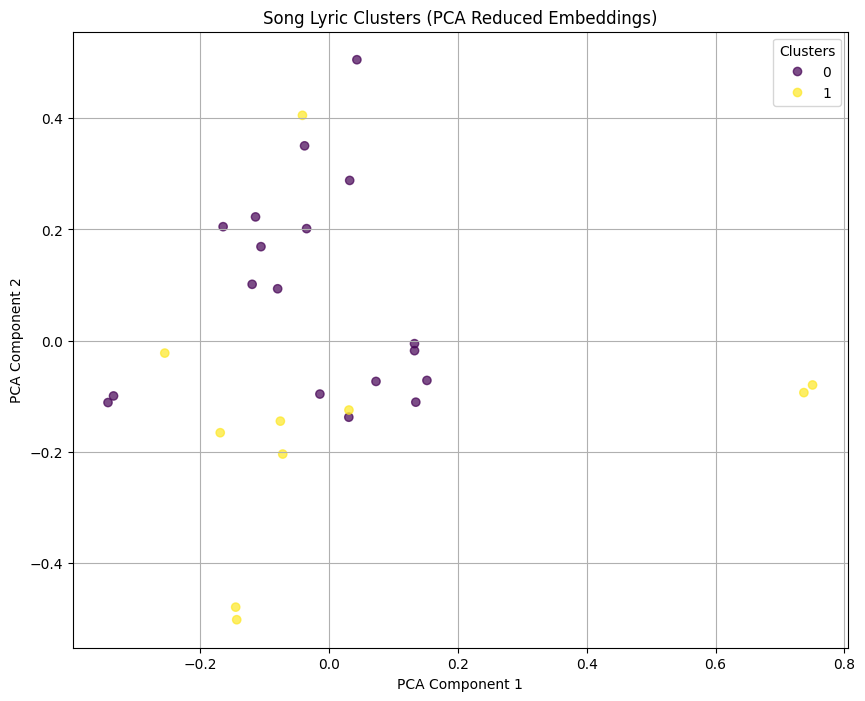


--- Sentiment Plot (PCA) ---


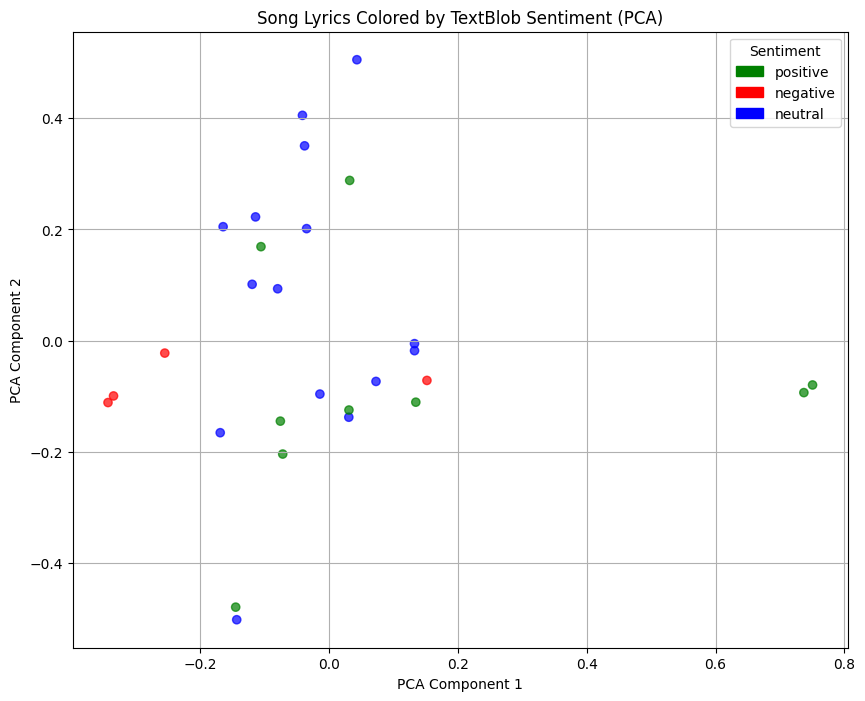


--- Project Steps Completed ---
1. Loaded lyrics and calculated TextBlob sentiment.
2. Encoded lyrics using Sentence-BERT.
3. Performed K-Means clustering (plots displayed above).
4. Analyzed sentiment distribution within clusters.
5. Visualized clusters using PCA (plots displayed above).


In [ ]:
print("\n--- Proceeding to Clustering w/ K-Means ---")
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 

# 1. Determine the optimal number of clusters (k) - Elbow Method Example
inertia = []
possible_k = range(1, 11) 

max_k = 10
if df.shape[0] < max_k:
    max_k = df.shape[0] # Adjust max_k if fewer samples than 10
    if max_k <= 0: # Check if dataframe is actually empty
        print("Error: DataFrame is empty. Cannot perform clustering.")
        # Handle empty DataFrame case appropriately, maybe exit or skip clustering
        exit() # Or raise an error, or return
    possible_k = range(1, max_k + 1)
    print(f"Warning: Fewer samples ({df.shape[0]}) than max_k=10. Testing k up to {max_k}.")


if max_k > 0: # Only run if there are samples
    print("Calculating inertia for Elbow Method...")
    for k in possible_k:
        # Use n_init='auto' if using scikit-learn >= 1.4, otherwise use 10
        try:
            kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        except TypeError: # Handle older scikit-learn versions
             kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(embeddings)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow curve and display it
    print("\n--- Elbow Method Plot ---")
    plt.figure(figsize=(8, 5))
    plt.plot(possible_k, inertia, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.xticks(possible_k)
    plt.grid(True)
    plt.show()

    # user input for optimal k
    chosen_k_input = input(f"\nEnter the optimal number of clusters (k) based on the Elbow plot above (e.g., 4): ")
    try:
        chosen_k = int(chosen_k_input)
        if chosen_k < 1 or chosen_k > max_k:
            print(f"Invalid k value. Using default k=4.")
            chosen_k = 4 # Default fallback
        else:
             print(f"Using k={chosen_k} for clustering.")
    except ValueError:
        print("Invalid input. Using default k=4.")
        chosen_k = 4 # Default fallback if input is not an integer

    # 2. Apply K-Means with the chosen k
    print(f"\nApplying K-Means with k={chosen_k}...")
    try:
        kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init='auto')
    except TypeError:
        kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
    kmeans.fit(embeddings)

    # 3. Get cluster labels
    cluster_labels = kmeans.labels_

    # 4. Add cluster labels to your DataFrame
    df['cluster'] = cluster_labels

    print("\n--- DataFrame with Cluster Labels ---")
    # Show more rows if possible
    print(df[['filename', 'textblob_classification', 'cluster']].head(10))


    # 1. Analyze Sentiment per Cluster
    print("\n--- Sentiment Analysis per Cluster ---")
    sentiment_per_cluster = df.groupby('cluster')['textblob_sentiment'].agg(['mean', 'std', 'count'])
    print("\nAverage TextBlob Sentiment per Cluster:")
    print(sentiment_per_cluster)

    sentiment_dist_per_cluster = df.groupby('cluster')['textblob_classification'].value_counts(normalize=True).unstack(fill_value=0)
    print("\nDistribution of TextBlob Classifications per Cluster:")
    print(sentiment_dist_per_cluster)

    # 2. Inspect Songs within Clusters
    print("\n--- Example Songs per Cluster ---")
    for i in range(chosen_k):
        print(f"\nCluster {i}:")
        # Get up to 5 filenames from this cluster
        cluster_songs = df[df['cluster'] == i]['filename'].head(5).tolist()
        if cluster_songs: # Check if list is not empty
             print(f"  Examples: {', '.join(cluster_songs)}")
        else:
             print("  No songs found in this cluster.")

    # 3. Visualize Clusters (using dimensionality reduction)
    print("\n--- Visualizing Clusters (using PCA) ---")
    from sklearn.decomposition import PCA

    # Check if embeddings exist and are not empty
    if 'embeddings' in locals() and embeddings.shape[0] > 0:
        # Ensure n_components is not greater than number of samples or features
        n_components = min(2, embeddings.shape[0], embeddings.shape[1])
        if n_components < 2:
             print("Not enough data points or features to reduce to 2 dimensions for plotting.")
        else:
            pca = PCA(n_components=n_components, random_state=42)
            embeddings_2d = pca.fit_transform(embeddings)

            df['pca_x'] = embeddings_2d[:, 0]
            df['pca_y'] = embeddings_2d[:, 1] if n_components == 2 else 0

            if n_components == 2:
                 # Plot 1: Clusters
                 print("\n--- Cluster Plot (PCA) ---")
                 plt.figure(figsize=(10, 8))
                 scatter = plt.scatter(df['pca_x'], df['pca_y'], c=df['cluster'], cmap='viridis', alpha=0.7)
                 plt.title('Song Lyric Clusters (PCA Reduced Embeddings)')
                 plt.xlabel('PCA Component 1')
                 plt.ylabel('PCA Component 2')
                 # Create legend elements safely
                 cluster_handles, cluster_labels_text = scatter.legend_elements()
                 plt.legend(handles=cluster_handles, labels=range(chosen_k), title="Clusters")
                 plt.grid(True)
                 plt.show() 

                 # Plot 2: Sentiment
                 print("\n--- Sentiment Plot (PCA) ---")
                 plt.figure(figsize=(10, 8))
                 sentiment_colors = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
                 # Ensure all classifications are in the map, add if necessary
                 for classification in df['textblob_classification'].unique():
                     if classification not in sentiment_colors:
                         sentiment_colors[classification] = 'grey' 

                 plt.scatter(df['pca_x'], df['pca_y'], c=df['textblob_classification'].map(sentiment_colors), alpha=0.7)
                 plt.title('Song Lyrics Colored by TextBlob Sentiment (PCA)')
                 plt.xlabel('PCA Component 1')
                 plt.ylabel('PCA Component 2')
                 # Create custom legend
                 handles = [mpatches.Patch(color=color, label=label) for label, color in sentiment_colors.items() if label in df['textblob_classification'].unique()]
                 plt.legend(handles=handles, title="Sentiment")
                 plt.grid(True)
                 plt.show() 
            else:
                 print("Cannot create 2D PCA plot.")

    else:
         print("Embeddings not found or empty, skipping PCA visualization.")

else:
    print("No data available to perform clustering.")


print("\n--- Project Steps Completed ---")
print("1. Loaded lyrics and calculated TextBlob sentiment.")
print("2. Encoded lyrics using Sentence-BERT.")
print("3. Performed K-Means clustering (plots displayed above).")
print("4. Analyzed sentiment distribution within clusters.")
print("5. Visualized clusters using PCA (plots displayed above).")

Alex Chang & Sam Lawrence 

Conclusion: We have made satisfactory progress on using TextBlob for classifying each file and using k-means clustering to analyze our limited amount of data. However, due to issues in accessing AZLyrics.com with our web scraper, we lack sufficient data to determine if our model works. Further work can be done in improving the web scraper and trying to access the site; once we can regain access to the site, we can retrieve more lyrics from more artists and determine the accuracy of the model. Before this happens, we can manually review our data and validate its findings. 

Tasks

Alex:

Completed the web scraper 

Attempted to debug and circumvent AZLyrics’ IP block 

Completed data processing (removed artist tags from song files) 

Sam: 

Extracted lyrics from .txt files and organized them into a Pandas data frame

Encoded lyrics using Sentence-BERT

Implemented K-Means clustering while experimenting with different values of K 

Implemented PCA for dimensionality reduction to graph our results 